In [491]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob


## Common

In [492]:
# glob load all jsonl files as pandas dataframes
df = pd.concat([pd.read_json(f, lines=True) for f in glob.glob('../results/benchmark/s3-*.jsonl')], ignore_index=True)


In [493]:
df


,receiver_start_delay,total_time,message_size,sender_usage,receiver_usage
0,-0.007237,4.017996,100000000,"{'s3:PutObject': 1, 's3:GetObject': 124, 's3:D...","{'s3:GetObject': 65, 's3:PutObject': 1, 's3:De..."
1,0.009144,4.264131,100000000,"{'s3:PutObject': 1, 's3:GetObject': 122, 's3:D...","{'s3:GetObject': 71, 's3:PutObject': 1, 's3:De..."
2,0.006754,4.471122,100000000,"{'s3:PutObject': 1, 's3:GetObject': 112, 's3:D...","{'s3:GetObject': 80, 's3:PutObject': 1, 's3:De..."
3,0.001843,4.024109,100000000,"{'s3:PutObject': 1, 's3:GetObject': 133, 's3:D...","{'s3:GetObject': 60, 's3:PutObject': 1, 's3:De..."
4,0.006202,4.020812,100000000,"{'s3:PutObject': 1, 's3:GetObject': 133, 's3:D...","{'s3:GetObject': 66, 's3:PutObject': 1, 's3:De..."
...,...,...,...,...,...
695,-0.000964,0.305464,1000000,"{'s3:PutObject': 1, 's3:GetObject': 11, 's3:De...","{'s3:GetObject': 8, 's3:PutObject': 1, 's3:Del..."
696,0.009815,0.285214,1000000,"{'s3:PutObject': 1, 's3:GetObject': 9, 's3:Del...","{'s3:GetObject': 8, 's3:PutObject': 1, 's3:Del..."
697,0.010974,0.519595,1000000,"{'s3:PutObject': 1, 's3:GetObject': 19, 's3:De...","{'s3:GetObject': 5, 's3:PutObject': 1, 's3:Del..."
698,0.003361,0.472062,1000000,"{'s3:PutObject': 1, 's3:GetObject': 16, 's3:De...","{'s3:GetObject': 11, 's3:PutObject': 1, 's3:De..."


In [494]:
# statistics about receiver_start_delay
df['receiver_start_delay'].describe()


count    700.000000
mean       0.001645
std        0.008530
min       -0.042537
25%       -0.002201
50%        0.001105
75%        0.005272
max        0.056628
Name: receiver_start_delay, dtype: float64

<AxesSubplot:xlabel='receiver_start_delay', ylabel='Count'>

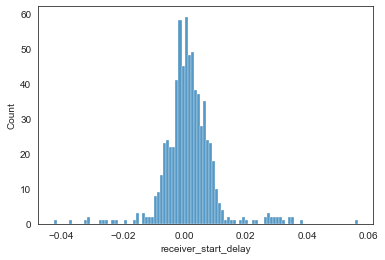

In [495]:
# histogram of receiver_start_delay
sns.histplot(data=df, x='receiver_start_delay', bins=100)


In [496]:
# remove rows wth receiver_start_delay > 0.01
df = df[df['receiver_start_delay'] < 0.01]


In [497]:
df['latency'] = df['total_time'] * 1000 / 2


/var/folders/3d/y6js050d1wx3_6ltnsbp3znh0000gn/T/ipykernel_97330/2113978645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latency'] = df['total_time'] * 1000 / 2


In [498]:
df


,receiver_start_delay,total_time,message_size,sender_usage,receiver_usage,latency
0,-0.007237,4.017996,100000000,"{'s3:PutObject': 1, 's3:GetObject': 124, 's3:D...","{'s3:GetObject': 65, 's3:PutObject': 1, 's3:De...",2008.997917
1,0.009144,4.264131,100000000,"{'s3:PutObject': 1, 's3:GetObject': 122, 's3:D...","{'s3:GetObject': 71, 's3:PutObject': 1, 's3:De...",2132.065535
2,0.006754,4.471122,100000000,"{'s3:PutObject': 1, 's3:GetObject': 112, 's3:D...","{'s3:GetObject': 80, 's3:PutObject': 1, 's3:De...",2235.561132
3,0.001843,4.024109,100000000,"{'s3:PutObject': 1, 's3:GetObject': 133, 's3:D...","{'s3:GetObject': 60, 's3:PutObject': 1, 's3:De...",2012.054324
4,0.006202,4.020812,100000000,"{'s3:PutObject': 1, 's3:GetObject': 133, 's3:D...","{'s3:GetObject': 66, 's3:PutObject': 1, 's3:De...",2010.406017
...,...,...,...,...,...,...
694,0.000381,0.383487,1000000,"{'s3:PutObject': 1, 's3:GetObject': 12, 's3:De...","{'s3:GetObject': 12, 's3:PutObject': 1, 's3:De...",191.743255
695,-0.000964,0.305464,1000000,"{'s3:PutObject': 1, 's3:GetObject': 11, 's3:De...","{'s3:GetObject': 8, 's3:PutObject': 1, 's3:Del...",152.732134
696,0.009815,0.285214,1000000,"{'s3:PutObject': 1, 's3:GetObject': 9, 's3:Del...","{'s3:GetObject': 8, 's3:PutObject': 1, 's3:Del...",142.606854
698,0.003361,0.472062,1000000,"{'s3:PutObject': 1, 's3:GetObject': 16, 's3:De...","{'s3:GetObject': 11, 's3:PutObject': 1, 's3:De...",236.031175


Text(0.5, 1.0, 'S3')

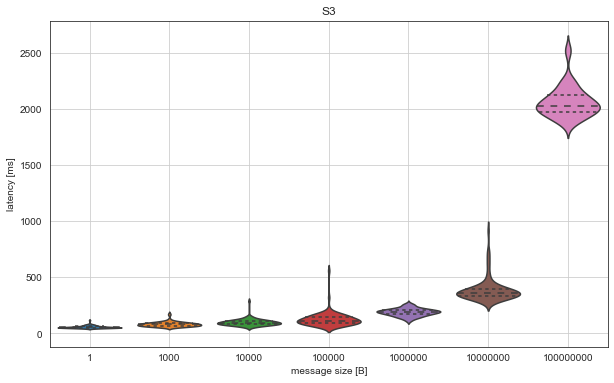

In [499]:
sns.violinplot(data=df, x='message_size', y='latency', inner='quart', scale='width')
plt.ylabel('latency [ms]')
plt.xlabel('message size [B]')
plt.grid(True)
plt.gcf().set_size_inches(10, 6)
plt.title("S3")


In [500]:
# a table with average values of latency for each message size
df.groupby('message_size').mean()['latency']


message_size
1              58.768798
1000           83.340301
10000          99.750294
100000        126.068606
1000000       190.686813
10000000      386.613259
100000000    2063.343679
Name: latency, dtype: float64

Text(0.5, 1.0, 'S3')

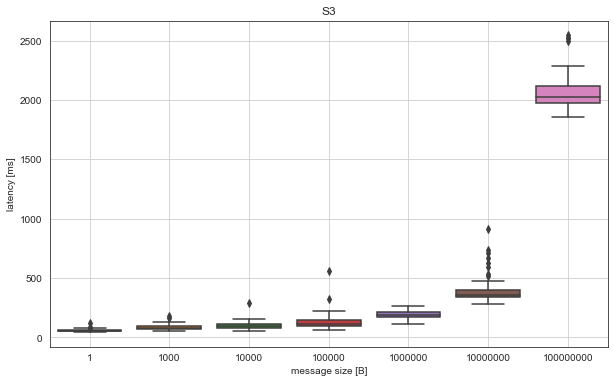

In [501]:
# box plots
sns.boxplot(data=df, x='message_size', y='latency')
plt.ylabel('latency [ms]')
plt.xlabel('message size [B]')
plt.grid(True)
plt.gcf().set_size_inches(10, 6)
plt.title("S3")


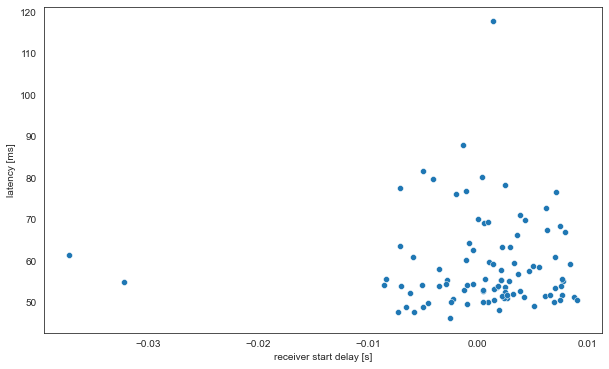

In [502]:
# scatter plot reveiver_start_delay vs latency
a = df[df['message_size'] == 1]
sns.scatterplot(data=a, x='receiver_start_delay', y='latency')
plt.ylabel('latency [ms]')
plt.xlabel('receiver start delay [s]')
plt.gcf().set_size_inches(10, 6)


In [503]:
global_results = {}


def format_byte_size(size):
    if size < 1000:
        return f"{size:.0f} B"
    elif size < 1000000:
        return f"{size / 1000:.0f} kB"
    elif size < 1000000000:
        return f"{size / 1000000:.0f} MB"
    else:
        return f"{size / 1000000000:.0f} GB"


def plot(method, log=False):
    print("Method:", method)

    df = pd.concat([
        pd.read_json(f, lines=True) for f in glob.glob(f'../results/benchmark/{method}-*.jsonl')
    ], ignore_index=True)

    # print("receiver_start_delay")
    # print(df['receiver_start_delay'].describe())
    # sns.histplot(data=df, x='receiver_start_delay', bins=100)
    # plt.show()

    # remove rows wth receiver_start_delay > 0.01
    df = df[df['receiver_start_delay'] < 0.01]

    df['latency'] = df['total_time'] * 1000 / 2

    # print("")
    # print("latency")
    # print(df['latency'].describe())
    # print(df.groupby('message_size').mean()['latency'])

    global_results[method] = df.groupby('message_size').mean()['latency']

    # print("")
    # print("98th percentile for each message size")
    # print(df.groupby('message_size').quantile(0.98)['latency'])

    # all message_sizes sorted
    message_sizes = sorted(df['message_size'].unique())

    # remove top of latency from each message size
    df = df.groupby('message_size').apply(
        lambda x: x[x['latency'] < x['latency'].quantile(0.98)])
    
    print("")
    print("latency vs message_size")
    sns.violinplot(data=df, x='message_size', y='latency', inner='quart', scale='width')
    plt.ylabel('latency [ms]')
    plt.xlabel('message size [B]')
    plt.grid(True)
    plt.gcf().set_size_inches(10, 6)
    plt.title(method)
    plt.xticks(range(len(message_sizes)), [format_byte_size(s) for s in message_sizes])
    if log:
        plt.yscale('log')
    plt.show()


# Results

Method: s3

latency vs message_size


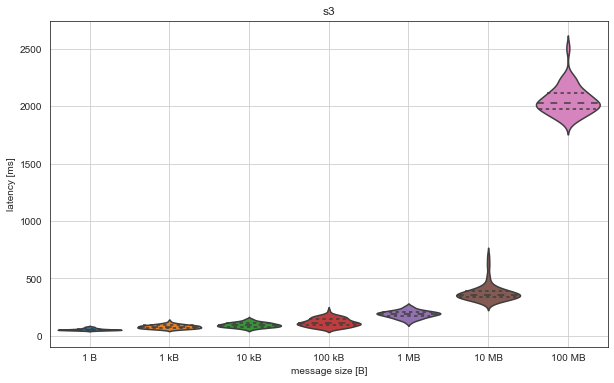

In [504]:
plot('s3')


Method: dynamodb

latency vs message_size


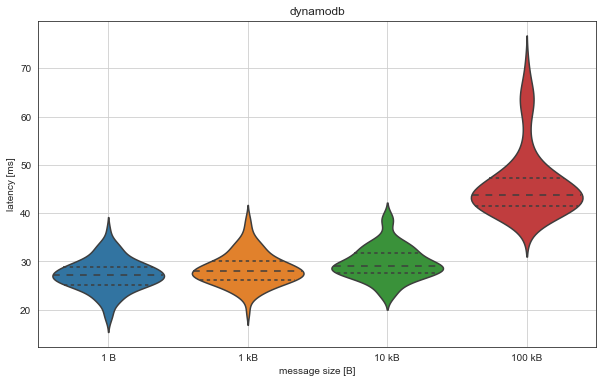

In [505]:
plot('dynamodb')


Method: efs

latency vs message_size


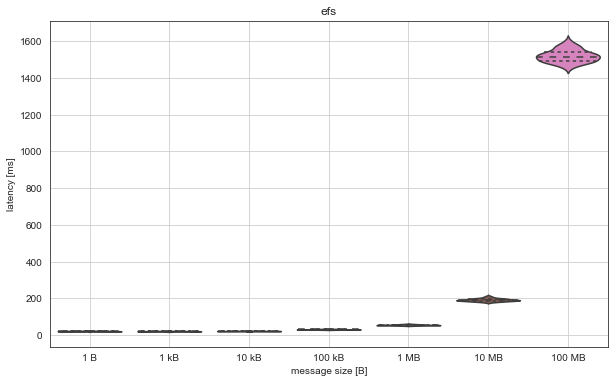

In [506]:
plot('efs')


Method: relay



latency vs message_size


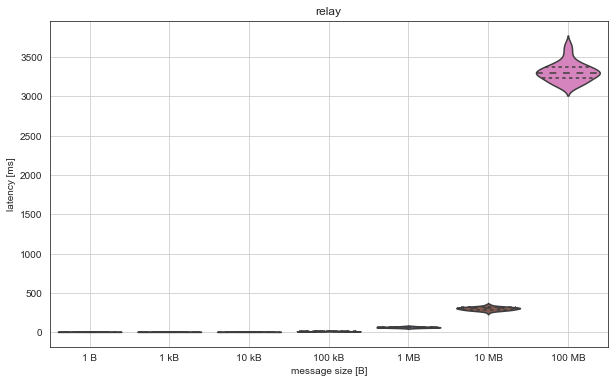

In [507]:
plot('relay')


Method: redis

latency vs message_size


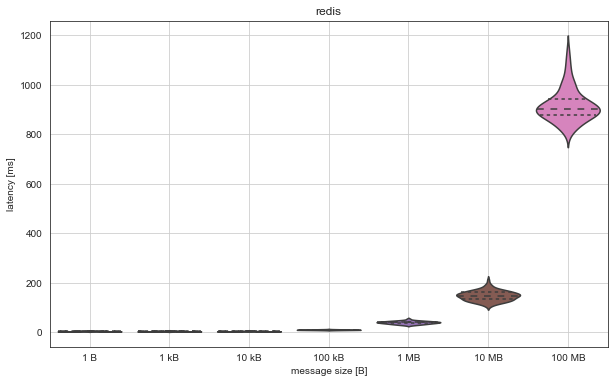

In [508]:
plot('redis')


Method: p2p

latency vs message_size


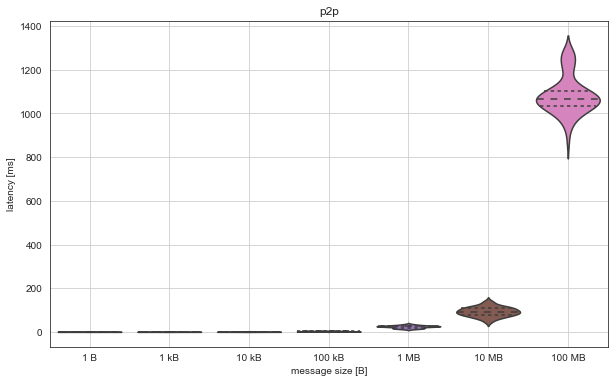

In [509]:
plot('p2p')


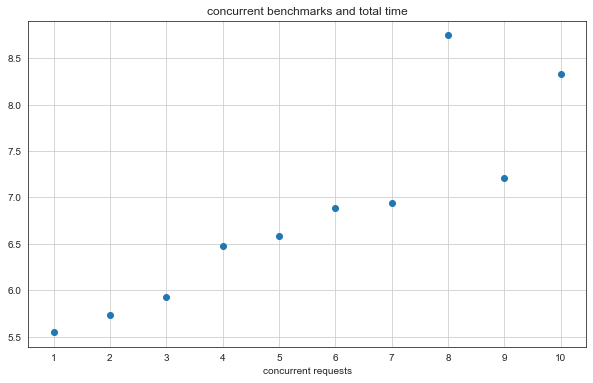

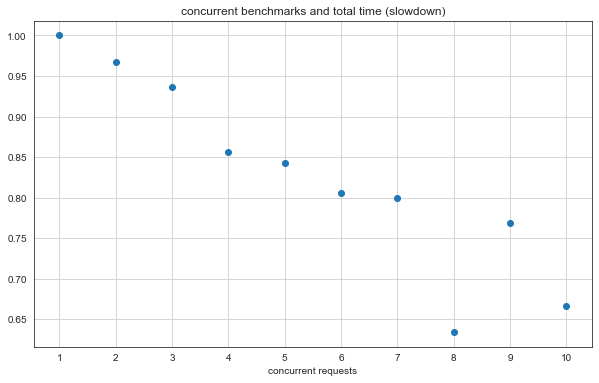

In [510]:
plt.title("concurrent benchmarks and total time")
y = [5.549, 5.736, 5.924, 6.479, 6.586, 6.886, 6.938, 8.746, 7.213, 8.327]
plt.scatter(range(1, len(y)+1), y)
plt.gcf().set_size_inches(10, 6)
# grid
plt.grid(True)
# x axis
plt.xlabel('concurrent requests')
plt.xticks(range(1, len(y)+1))
plt.show()

# divide everyting in y by first element and show plot again
plt.title("concurrent benchmarks and total time (slowdown)")
y = [1 / (v / y[0]) for v in y]
plt.scatter(range(1, len(y)+1), y)
plt.gcf().set_size_inches(10, 6)
# grid
plt.grid(True)
# x axis
plt.xlabel('concurrent requests')
plt.xticks(range(1, len(y)+1))
plt.show()


## Log

Method: s3

latency vs message_size


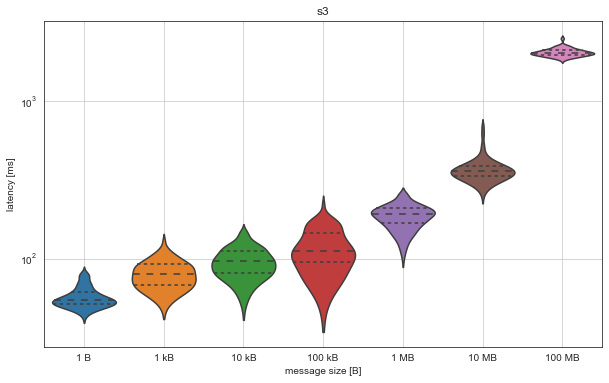

Method: dynamodb

latency vs message_size


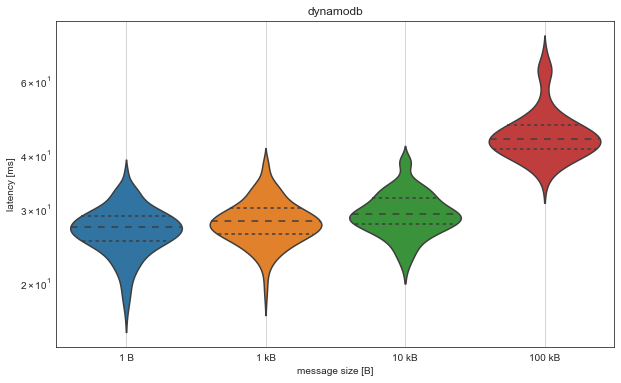

Method: efs

latency vs message_size


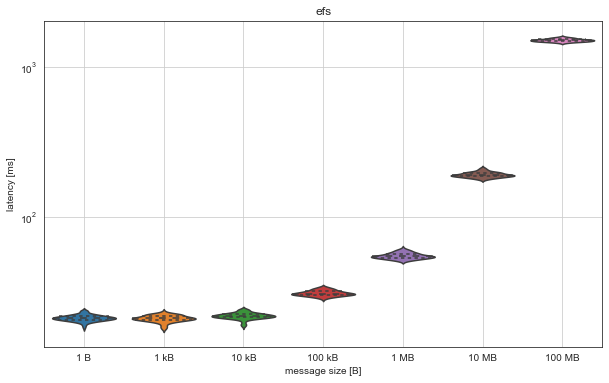

Method: relay

latency vs message_size


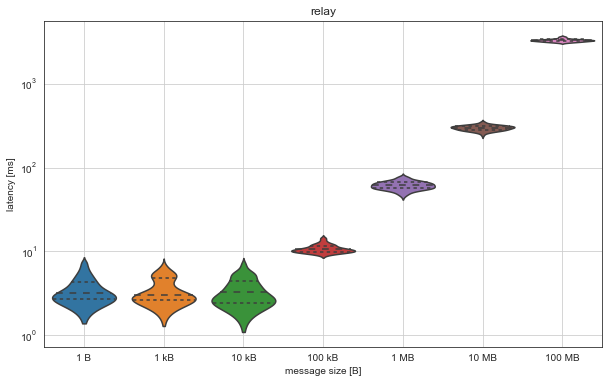

Method: redis

latency vs message_size


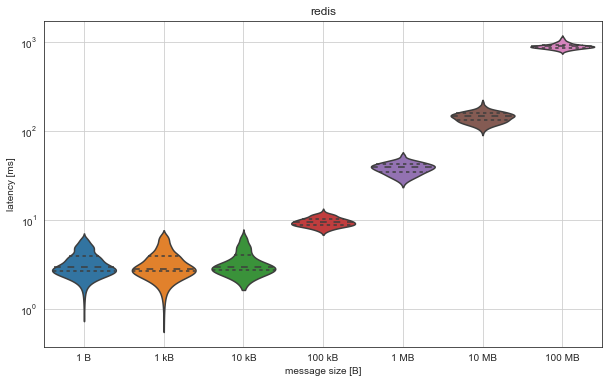

Method: p2p

latency vs message_size


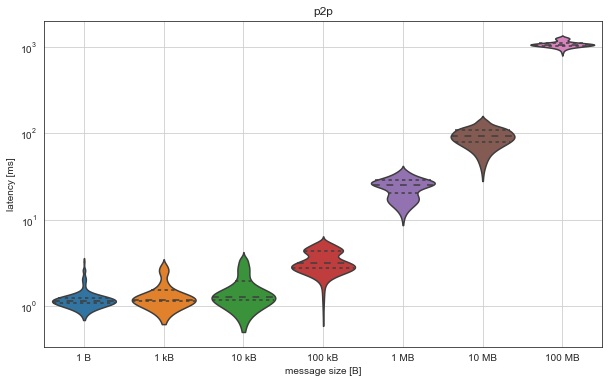

In [511]:
plot('s3', log=True)
plot('dynamodb', log=True)
plot('efs', log=True)
plot('relay', log=True)
plot('redis', log=True)
plot('p2p', log=True)


# Summary

In [512]:
# table of average latency for each message size
df = pd.DataFrame(global_results)
df.index = [format_byte_size(s) for s in df.index]
df


,s3,dynamodb,efs,relay,redis,p2p
1 B,58.768798,27.618315,21.374255,3.811536,3.577431,1.332538
1 kB,83.340301,28.819843,21.206665,3.775670,3.602411,1.710508
10 kB,99.750294,30.037918,22.129060,3.668815,3.623489,1.744096
100 kB,126.068606,46.794798,31.245752,10.978292,9.770066,3.629475
1 MB,190.686813,NaN,55.469368,62.469127,39.534291,25.262434
10 MB,386.613259,NaN,193.676699,300.798226,148.974012,95.131799
100 MB,2063.343679,NaN,1552.822115,3324.972955,922.931797,1108.667938


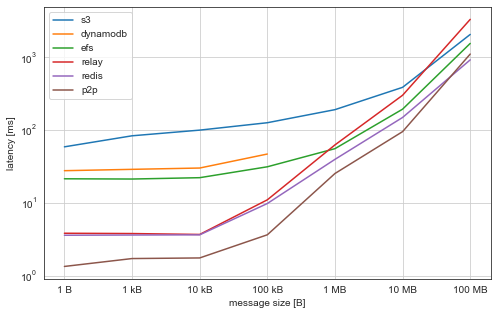

In [513]:
# df.plot()
# plt.ylabel('latency [ms]')
# plt.xlabel('message size [B]')
# plt.gcf().set_size_inches(13, 8)
# plt.grid(True)

# different plot
df.plot(logy=True)
plt.ylabel('latency [ms]')
plt.xlabel('message size [B]')
plt.gcf().set_size_inches(8, 5)
plt.grid(True)
sns.set_style("white")


# Cross Comparison

585


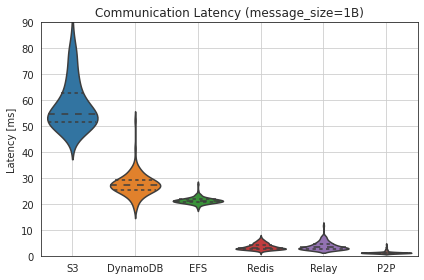

In [514]:
methods = [
  's3',
  'dynamodb',
  'efs',
  'redis',
  'relay',
  'p2p',
]

# Prepare data
dfs = []
for method in methods:
    df = pd.concat([
        pd.read_json(f, lines=True) for f in glob.glob(f'../results/benchmark/{method}-*.jsonl')
    ], ignore_index=True)
    df['method'] = method
    df = df[df['receiver_start_delay'] < 0.01]
    df['latency'] = df['total_time'] * 1000 / 2
    dfs.append(df)

df = pd.concat(dfs)

df = df.query('message_size == 1')

df['method'] = df['method'].map({
    's3': 'S3',
    'dynamodb': 'DynamoDB',
    'efs': 'EFS',
    'redis': 'Redis',
    'relay': 'Relay',
    'p2p': 'P2P',
})

print(len(df))
plt.rcParams['font.family'] = 'Linux Libertine'
plt.rcParams['svg.fonttype'] = 'none'

sns.violinplot(data=df, x='method', y='latency', scale='width', inner='quart').set(xlabel=None)
plt.ylabel('Latency [ms]')
# dont show xlabel
# plt.xlabel('')
plt.xticks([0, 1, 2, 3, 4, 5], ['S3', 'DynamoDB', 'EFS', 'Redis', 'Relay', 'P2P'])
plt.ylim(0, 90)
plt.grid(True)
plt.gcf().set_size_inches(6, 4)
plt.title("Communication Latency (message_size=1B)")
# simple theme
sns.set_style("white")

# tight layout
plt.tight_layout()

plt.savefig("img/tmp-latency-1b.svg")


In [515]:
def quantile_99(x):
    return np.quantile(x, 0.99)

# get average latency and standard deviation for each method, rouded to 2 decimal places
df.groupby(['method']).agg({'latency': ['mean', 'std', quantile_99]}).round(1)


latency                  
            mean   std quantile_99
method                            
DynamoDB    27.6   4.4        42.1
EFS         21.4   1.2        25.1
P2P          1.3   0.5         3.3
Redis        3.6   1.1         6.4
Relay        3.8   1.6         7.7
S3          58.8  11.0        89.6

In [516]:
methods = [
  's3',
  'dynamodb',
  'efs',
  'redis',
  'relay',
  'p2p',
]

# Prepare data
dfs = []
for method in methods:
    df = pd.concat([
        pd.read_json(f, lines=True) for f in glob.glob(f'../results/benchmark/{method}-*.jsonl')
    ], ignore_index=True)
    df['method'] = method
    df = df[df['receiver_start_delay'] < 0.01]
    df['latency'] = df['total_time'] * 1000 / 2
    dfs.append(df)

df = pd.concat(dfs)

df['method'] = df['method'].map({
    's3': 'S3',
    'dynamodb': 'DynamoDB',
    'efs': 'EFS',
    'redis': 'Redis',
    'relay': 'Relay',
    'p2p': 'P2P',
})

message_size = 100000000

df = df[df['message_size'] == message_size]


In [517]:
message_size = 100_000_000

def throughput(a):
    #                           ms -> s            MB -> b
    return message_size / (np.mean(a) / 1000) / 1_000_000 * 8

# get average latency and standard deviation for each method, rouded to 2 decimal places
df.groupby(['method']).agg({'latency': ['mean', 'std', quantile_99, throughput]}).style.format('{:.0f}')


In [518]:
df.groupby('method').count()


,receiver_start_delay,total_time,message_size,sender_usage,receiver_usage,latency
method,,,,,,
EFS,98,98,98,98,98,98
P2P,82,82,82,82,82,82
Redis,94,94,94,94,94,94
Relay,100,100,100,100,100,100
S3,93,93,93,93,93,93


In [519]:
len(df)


467

In [520]:
df.groupby(['method']).quantile(0.99).round(1)


/var/folders/3d/y6js050d1wx3_6ltnsbp3znh0000gn/T/ipykernel_97330/584633452.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df.groupby(['method']).quantile(0.99).round(1)


,receiver_start_delay,total_time,message_size,latency
method,,,,
EFS,0.0,3.4,100000000.0,1714.6
P2P,0.0,3.3,100000000.0,1669.0
Redis,0.0,2.4,100000000.0,1190.9
Relay,0.0,7.4,100000000.0,3711.5
S3,0.0,5.0,100000000.0,2522.0


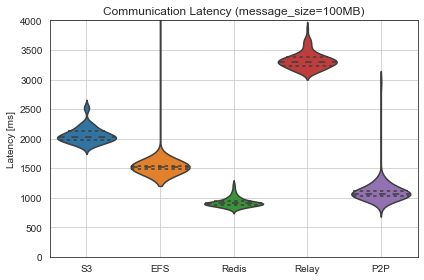

In [521]:
sns.violinplot(data=df, x='method', y='latency', inner="quart", scale='width').set(xlabel=None)
plt.ylabel('Latency [ms]')
# dont show xlabel
# plt.xlabel('')
plt.ylim(0, 4000)
plt.grid(True)
plt.gcf().set_size_inches(6, 4)
plt.title("Communication Latency (message_size=100MB)")
plt.xticks([0, 1, 2, 3, 4], ['S3', 'EFS', 'Redis', 'Relay', 'P2P'])
# simple theme
sns.set_style("white")

# tight layout
plt.tight_layout()

# add padding on right size
# plt.subplots_adjust(right=0.94)

plt.savefig("img/tmp-latency-100mb.svg")


In [522]:
methods = [
  's3',
  'dynamodb',
  'efs',
  'redis',
  'relay',
  'p2p',
]

# Prepare data
dfs = []
for method in methods:
    df = pd.concat([
        pd.read_json(f, lines=True) for f in glob.glob(f'../results/benchmark/{method}-*.jsonl')
    ], ignore_index=True)
    df['method'] = method
    df = df[df['receiver_start_delay'] < 0.01]
    df['latency'] = df['total_time'] * 1000 / 2
    dfs.append(df)

df = pd.concat(dfs)

df = df[df['message_size'] == 100000]

df.groupby(['method']).agg({'latency': ['mean', 'std']}).round(1)


latency      
            mean   std
method                
dynamodb    46.8   8.1
efs         31.2   1.4
p2p          3.6   1.0
redis        9.8   1.2
relay       11.0   1.4
s3         126.1  61.4